<a href="https://colab.research.google.com/github/viktorcseppento/StudentDataVisualization/blob/master/How_to_Succeed_in_Exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
In this notebook, I am trying to find out what factors affect exam scores in high school. I am using a [Kaggle dataset](https://www.kaggle.com/spscientist/students-performance-in-exams) with 1000 rows, 8 values each. This is enough information for proper statistical conclusions. It satisfies the rule of thumb that

\begin{align}
number\ of\ rows > 2^{number\ of\ columns}
\end{align}

The dataset informs us about the students' personal backgrounds and their test grades from three subjects.

The main questions I am trying to answer:
- Is test preparation course worth it?
- What is the ideal student like?

In [0]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})
# opening file
dataset = pd.read_csv('StudentsPerformance.csv')
length = len(dataset)
# get the first 5 sample
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


There are 5 factors that could influence test scores:
- gender
- ethnicity
- parents' level of education
- lunch cost
- test preparation course completion


Ideally gender, ethnicity, lunch cost should not affect performance but we may be wrong this time. <br>
Below, we can observe that the math test is the hardest and reading test is the easiest for the average student.<br>But who is the average student?

In [0]:
# extending the dataframe with average column
dataset['average score'] = (dataset['math score'] + dataset['reading score'] + dataset['writing score']) / 3
dataset.sort_values(by=['average score'], inplace = True)
dataset.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
980,female,group B,high school,free/reduced,none,8,24,23,18.333333
596,male,group B,high school,free/reduced,none,30,24,15,23.000000
327,male,group A,some college,free/reduced,none,28,23,19,23.333333
76,male,group E,some high school,standard,none,30,26,22,26.000000


#End of the debate: the smarter sex

First, let's filter by gender

In [0]:

boy_scores = dataset[dataset['gender'] == 'male']
girl_scores = dataset[dataset['gender'] == 'female']

Get a graphical representation of average scores

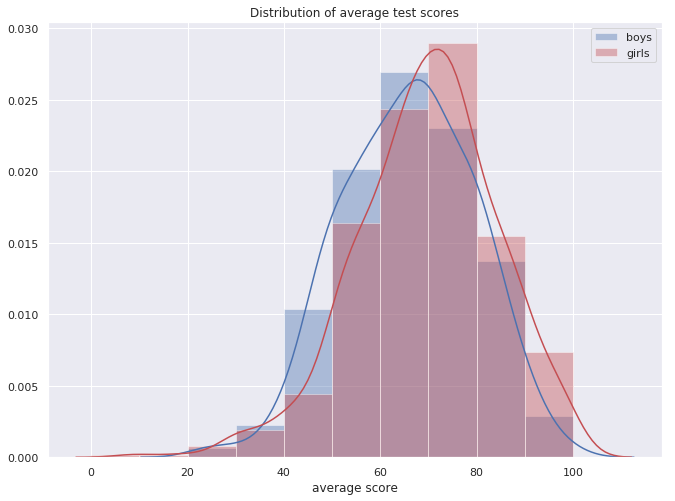

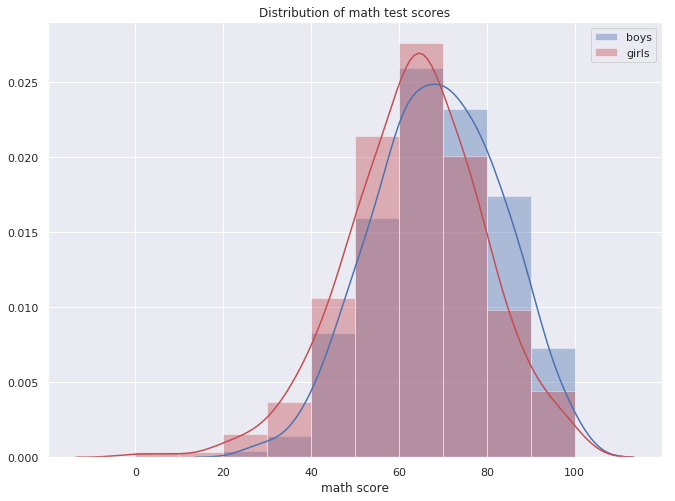

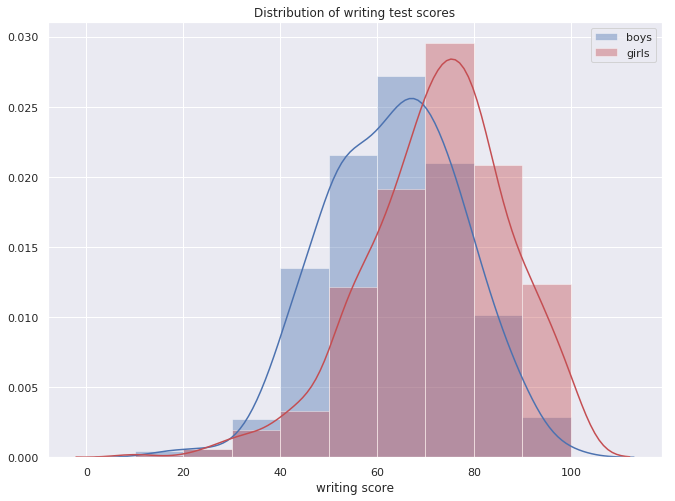

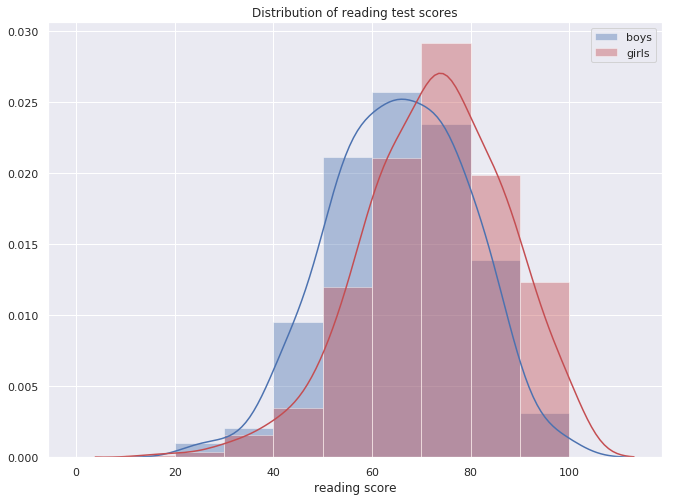

In [0]:
plt.figure(0)
sns.distplot(boy_scores['average score'], bins = np.arange(0,101,10), color = 'b')
sns.distplot(girl_scores['average score'], bins = np.arange(0,101,10), color = 'r')
plt.title("Distribution of average test scores")
plt.legend(labels=['boys','girls'])

plt.figure(1)
sns.distplot(boy_scores['math score'], bins = np.arange(0,101,10), color = 'b')
sns.distplot(girl_scores['math score'], bins = np.arange(0,101,10), color = 'r')
plt.title("Distribution of math test scores")
plt.legend(labels=['boys','girls'])

plt.figure(2)
sns.distplot(boy_scores['writing score'], bins = np.arange(0,101,10), color = 'b')
sns.distplot(girl_scores['writing score'], bins = np.arange(0,101,10), color = 'r')
plt.title("Distribution of writing test scores")
plt.legend(labels=['boys','girls'])

plt.figure(3)
sns.distplot(boy_scores['reading score'], bins = np.arange(0,101,10), color = 'b')
sns.distplot(girl_scores['reading score'], bins = np.arange(0,101,10), color = 'r')
plt.title("Distribution of reading test scores")
plt.legend(labels=['boys','girls'])

From the plot we can deduce that the girls performed much better, only in maths did the boys win.
Before we jump into conclusions first, we should do a statistical check.
<br><br>
Hypothesis: the gender does not matter.
<br>Method: bootstrap analysis.

In [0]:
boy_avg = boy_scores['average score']
girl_avg = girl_scores['average score']
girl_avg_mean = np.mean(girl_avg)
boy_avg_mean = np.mean(boy_avg)
print("Girl average score mean: " + str(girl_avg_mean))
print("Boy average score mean: " + str(boy_avg_mean))
diff_mean = girl_avg_mean - boy_avg_mean
print("Mean difference: " + str(diff_mean))
boot_mean_diff = [];

for i in range(5000):
  boot_boy = boy_avg.sample(frac = 1, replace = True)
  boot_girl = girl_avg.sample(frac = 1, replace = True)
  boot_mean_diff.append(boot_girl.mean() - boot_boy.mean())

# 2.5, 97.5 percentiles and median
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.5, 0.975]) 
confidence_interval

Girl average score mean: 69.56949806949804
Boy average score mean: 65.8374827109267
Mean difference: 3.7320153585713456


0.025    2.005042
0.500    3.743136
0.975    5.464831
dtype: float64

From this test we can safely say that the girls were cleverer than the boys.

#The Richer the Cleverer?

In this section I am going to make a connection between the wealth of the family and the performance.
The columns that could tell information about this are: ethnicity and the preparation course status.

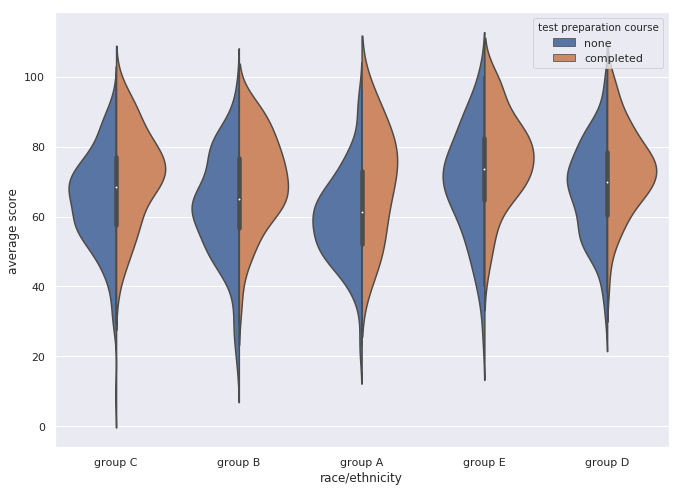

In [0]:
sns.violinplot(x = 'race/ethnicity', y = 'average score', hue = 'test preparation course', data = dataset, split = True)

It can be seen that taking the course didn't really improve the performance in every ethnicity group, and group E had the highest scores. The course may not be worth it, though does not do harm.

#Family effects

The last 2 remaining columns are lunch and parental education levels. Students get cheaper lunch if they live in a big or a poor family. Parental education levels may reduce the need of taking a special course.

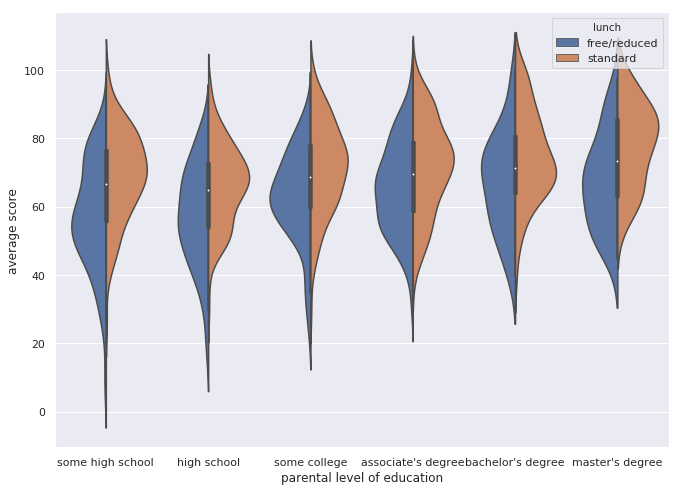

In [0]:
sns.violinplot(x = 'parental level of education', y = 'average score', hue = 'lunch', data = dataset, split = True)

We can deduce that standard lunch price and better parental education level means better exam scores. This also has connection with the financial situation of the family.

#Mr./Miss Average
Let's find out who are the average students.

In [0]:
average = np.mean(dataset['average score']);
print("Mean average score: " + str(average))
bound = 0.2
dataset[abs(dataset['average score'] - average) <= bound]

Mean average score: 67.77066666666674


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
569,male,group D,bachelor's degree,free/reduced,none,68,68,67,67.666667
431,female,group C,high school,standard,none,61,72,70,67.666667
498,female,group B,some high school,standard,none,66,69,68,67.666667
547,male,group C,high school,standard,completed,72,67,64,67.666667
553,male,group D,some college,free/reduced,none,77,62,64,67.666667
318,male,group B,bachelor's degree,standard,none,63,71,69,67.666667
355,female,group B,bachelor's degree,standard,none,61,72,70,67.666667


They are the average students. They mostly get standard lunch, did not complete the special course and do not belong to group A.

#Conclusion
Based on the visualizations and other methods we can conclude that the perfect student:
- is a girl
- has standard lunch
- her parents have master's degree
- belongs to ethnicity group E
- had taken the preparation course.